In [14]:
import numpy as np
import pandas as pd



In [60]:
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("AER_credit_card_data.csv")

In [16]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [19]:
df.card.unique()

array(['yes', 'no'], dtype=object)

In [20]:
card_values = {
    'yes': 1,
    'no': 0
}

df.card = df.card.map(card_values)

In [26]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_full_train, df_test = train_test_split(df, test_size=.2, random_state=1)

In [34]:
df_train, df_val = train_test_split(df_full_train, test_size=.20 / .80, random_state=1)

In [36]:
len(df_train), len(df_val), len(df_test)

(791, 264, 264)

In [37]:
categorical = []
numerical = []
for c, t in zip(df.columns, df.dtypes):
    if t == 'object':
        categorical.append(c)
    else:
        numerical.append(c)

In [39]:
numerical

['card',
 'reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [41]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [49]:
numerical

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [50]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


the answer to question 1 is share

In [52]:
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [53]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [54]:
def train(df_train, y_train, features, C=1.0, max_iter=1000):
    df_train = df_train[features]
    #print(len(df_train))
    dicts = df_train.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    #print(len(X_train))
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=max_iter)
    model.fit(X_train, y_train)
    
    return dv, model
    

In [55]:
def predict(df, dv, model, features):
    df = df[features]
    
    dicts = df.to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred
    

In [56]:
dv, model = train(df_train, y_train, features)
y_pred = predict(df_val, dv, model, features)

auc = roc_auc_score(y_val, y_pred)
auc

0.995171242063847

the answer to number 2 is .995

In [57]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [58]:
thresholds = np.linspace(0, 1, 101)
len(thresholds)

101

In [59]:
recall_scores = []
precision_scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)

    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    fp = (actual_negative & predicted_positive).sum()
    fn = (actual_positive & predicted_negative).sum()

    precision = tp / (tp + fp)
    precision_scores.append(precision)
    
    recall = tp / (tp + fn)
    recall_scores.append(recall)


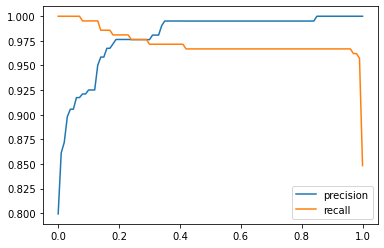

In [61]:
plt.plot(thresholds, precision_scores, label='precision')
plt.plot(thresholds, recall_scores, label='recall')
plt.legend()
plt.show()

In [ ]:
the threshold they interect at is roughly 0.3

In [ ]:
# Question 4



In [64]:
recall_scores = []
precision_scores = []
f1_scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)

    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    fp = (actual_negative & predicted_positive).sum()
    fn = (actual_positive & predicted_negative).sum()

    precision = tp / (tp + fp)
    precision_scores.append(precision)
    
    recall = tp / (tp + fn)
    recall_scores.append(recall)
    
    f1 = 2 * (precision * recall) / (precision + recall)
    f1_scores.append((t, f1))

In [65]:
sorted_f1_scores = sorted(f1_scores, reverse=True, key=lambda x: x[1])
best_f1_threshold = sorted_f1_scores[0][0]
best_f1_threshold

0.35000000000000003

I guess the answer would be 0.4

In [66]:
# Question 5

In [67]:
from sklearn.model_selection import KFold

In [72]:
# i hadnt originally split into df_full_train until this question so now i made it up above, and I
# gpt the full y and deleted from df_full_train

y_full = df_full_train['card'].values
del df_full_train['card']

In [76]:
df_full_train['card'] = y_full


/var/folders/v9/93rc7dfs375c0pyff8wx6c6h0000gn/T/ipykernel_34387/1254168845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_train['card'] = y_full


In [73]:
n_splits = 5
C=1
scores = []

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    
    y_train = y_full[train_idx]
    y_val = y_full[val_idx]

    dv, model = train(df_train, y_train, features=features, C=C)
    y_pred = predict(df_val, dv, model, features=features)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1 0.994 +- 0.000
C=1 0.994 +- 0.000
C=1 0.994 +- 0.000
C=1 0.996 +- 0.002
C=1 0.996 +- 0.003


In [79]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, features=features, C=C)
    y_pred = predict(df_val, dv, model, features=features)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


I'm pretty sure the anwer to number 5 is 0.003

In [80]:
# Question 6

In [81]:
for C in [0.01, 0.1, 1, 10]:
    
    n_splits = 5

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, features=features, C=C)
        y_pred = predict(df_val, dv, model, features=features)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print(f'C: {C}')
    print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

C: 0.01
0.992 +- 0.006
C: 0.1
0.995 +- 0.004
C: 1
0.996 +- 0.003
C: 10
0.996 +- 0.003


In [82]:
# If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

so based on the criteria above the best C is 1

In [83]:
folds = KFold(n_splits=5, shuffle=True, random_state=1)

In [85]:
type(folds)

sklearn.model_selection._split.KFold

In [88]:
for train, val in folds.split(df_full_train):
    print(len(train), len(val))

844 211
844 211
844 211
844 211
844 211
